# Import

In [1]:
import numpy as np 
import matplotlib 
from matplotlib import pyplot as plt
import networkx as nx 
import community.community_louvain
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
import scipy.stats as stats
import pandas as pd 

## Part A

In [2]:
def part1(partition):
    partition_value=list(partition.values())
    partition_key=list(partition.keys())
    number_of_comm=max(partition_value)+1
    print('number of communities: ', number_of_comm)
    return partition_value, partition_key, number_of_comm

def GraphRelabeling(old_graph, node_labels):
    graph_mat = nx.adjacency_matrix(old_graph, nodelist = node_labels)
    sparse_adj = np.array(graph_mat.todense())
    relabeled_graph = nx.from_numpy_matrix(sparse_adj)
    return sparse_adj, relabeled_graph

def InitialSortingCommunities(partition_value, partition_key, number_of_comm):
    index_comm=[]
    for i in range(0,number_of_comm):
        x=[np.where(np.array(partition_value)==i)[0]]
        index_comm.extend(x) 
    node_list_temp=[]
    size=[]
    for i in range(0,number_of_comm):
        c=np.where(np.array(partition_value)==i)[0]
        size.append(c.size)
        node_list_temp.extend([np.array(partition_key)[c]])
    print("size: ", size)
    print("number of communitis: ", len(size))
    #node_list_old=sorted(node_list_temp,key=len)
    node_list=[]
    for i in range(0, number_of_comm):
        node_list.extend(list(node_list_temp[i]))
    return size, node_list, node_list_temp

def SumOfRCofCommunities(comm_size, B):
    ind_list = [sum(comm_size[:i]) for i in range(0, len(comm_size) + 1)]
    Emp = np.zeros([len(comm_size), len(comm_size)])
    for j in range(0, len(comm_size)): 
        emp = []
        sub_mat = B[ind_list[j]:ind_list[j + 1], :]
        for i in range(0, len(comm_size)):
            emp.append(np.sum(sub_mat[:, ind_list[i]:ind_list[i+1]]))
            #print(emp)
        Emp[j, :] = np.array(emp)
    df = pd.DataFrame(Emp)
    return Emp, df

def BetterPartition(Emp, comm_size): 
    first_row_sum = Emp[0,:]
    n = [i for i in range(0, len(comm_size))]
    myzip =  zip(n[1:], first_row_sum[1:])
    mydictionary = dict(myzip)
    sorted_dict = dict(sorted(mydictionary.items(), key = lambda x: x[1], reverse = True))
    lsorted_dict = list(sorted_dict.keys())
    partition_list = [0] + lsorted_dict
    return partition_list

def RelabelBetterPartion(partition_list, node_list_temp):
    comm_list_new = []
    comm_size_new = []
    for i in partition_list: 
        comm_size_new.append(len(node_list_temp[i]))
        comm_list_new.extend(node_list_temp[i]) 
    return comm_size_new, comm_list_new

## Part B.1

In [4]:
def DisCnt(d,X,beta):
    D=(1-(1-d)*(abs(X)**beta))
    #D=np.cos((1-d)*X)
    #D=d + 0*beta
    #D=1
    sgnX=np.sign(X)
    signM=sgnX*np.transpose(sgnX)
    N=(signM==-1)*1
    P=(signM >=0)*1
    DisCount=N*D+P
    return DisCount

In [5]:
def UpdateRule2(A,X,beta):
    B=A*np.transpose(np.abs(X))
    D=DisCnt(d,X,beta)
    #D=1
    C=B*D
    P=np.transpose(np.sign(X))-X
    out=np.sum(C*P,axis=1,keepdims = True)+X
    return out 

def WSGraph(NodesNum,pG,kr): 
    G=nx.watts_strogatz_graph(NodesNum, kr,pG,seed=None)
    B = nx.adjacency_matrix(G)
    AG=np.array(B.todense())
    cc=nx.average_clustering(G) 
    aspl=nx.average_shortest_path_length(G)
    return AG,cc,aspl

def PossibleInteGraph(NodesNum,pL,AG):
    RandInt=np.random.rand(NodesNum,NodesNum)
    Smaller=(RandInt<=pL)*1
    Bigger=(RandInt>=(pL))*1
    InteGraph=(Smaller*(1)+Bigger*(0))*AG
    return InteGraph

def Initial(a2,b2,NodesNum):
    X0=(a2)+(b2-a2)*np.random.rand(NodesNum,1) #initial state 
    return X0

def checkWeight(arr,value):
    if np.prod(arr>=value):
        ok=1
        ind=[]
    else:
        ok=0
        ind=np.where(arr<value)
    return ok,ind

def checkSum(arr,value):
    if np.prod(arr<=value):
        ok=1
        ind=[]
    else:
        ok=0
        ind=np.where(arr>value)
    return ok,ind

def Adjacency(G):
    B = nx.adjacency_matrix(G)
    AG=np.array(B.todense())
    return AG

In [6]:
def myROot(GammaB, d):
  alpha=np.linspace(0,1,100)
  f=(1-(1-d)*alpha)*(1+alpha)
  delta=min(f)
  Roots=np.roots([1, -1, delta/GammaB])
  r1=min(Roots)
  r2=max(Roots)
  print('alpha_1={}, alpha2={}'.format(r1,r2))
  return r1, r2

In [7]:
def UpDown(bubble, alpha1, alpha2, sizeB, iBubble):
    if all(bubble[-1]>=0):
      ## bubble (+) initial
      indexUi=(bubble>=1*alpha1)*1
      indexUiMat=np.dot(indexUi,np.ones([sizeB,1]))
      t0B=np.min(np.where(indexUiMat==sizeB)[0])
      print('+Up+')
      print('t0_B{}='.format(iBubble),t0B1)

      ## bubble (+) infinite time
      indexUinf=(bubble>=1*alpha2)*1
      indexUinfMat=np.dot(indexUinf,np.ones([sizeB,1]))
      Tinf=np.min(np.where(indexUinfMat==sizeB)[0])
      print('+Up+')
      print('Tinf_B{}='.format(iBubble),Tinf)
    elif all(bubble[-1]<=0):
      ## bubble (-) initial
      indexDi=(bubble1<=-1*alpha1)*1
      indexDiMat=np.dot(indexDi,np.ones([sizeB,1]))
      t0B=np.min(np.where(indexDiMat==sizeB)[0])
      print('-Down-')
      print('t0_B{}='.format(iBubble),t0B1)

      ## bubble (-) infinite time
      indexDinf=(bubble<=-1*alpha2)*1
      indexDinfMat=np.dot(indexDinf,np.ones([sizeB,1]))
      Tinf=np.min(np.where(indexDinfMat==sizeB)[0])
      print('-Down-')
      print('Tinf_B{}='.format(iBubble),Tinf)

    return t0B, Tinf

## Plot Function 

In [8]:
def PlotMyFig(tStop,bubble1,bubble2,MedianB1,MedianB2):
  
  mylinestyle='-.'
  color1='#7c2a20'
  color2='#34475b'

  #color1='red'
  #color2='green'

  color3='#cd8f87'
  color4='#8799aa'

  plt.plot(bubble1[0:(tStop+1)][:],color=color1,linewidth=0.3)
  plt.plot(bubble2[0:(tStop+1)][:],color=color2,linewidth=0.3)


  #plt.plot(MedianB1,color=color3,  linestyle = mylinestyle,linewidth=2.2)
  #plt.plot(MedianB2,color=color4, linestyle = mylinestyle,linewidth=2.2)


  plt.rcParams["figure.figsize"] = [12,5]
  plt.xlabel("t")
  plt.ylabel("x(t)")

  patch1 = mpatches.Patch(color=color1, label='Bubble 1')
  patch2 = mpatches.Patch(color=color2, label='Bubble 2')

  #patch3 = mpatches.Patch(color=color3, linestyle = mylinestyle,label=r'Med$(B_1)$')
  #patch4 = mpatches.Patch(color=color4, linestyle = mylinestyle,label=r'Med$(B_2)$')

  legend_bubble1 = mlines.Line2D([], [], color=color1,
                          markersize=1, label='Bubble 1')
  
  legend_bubble2 = mlines.Line2D([], [], color=color2,
                          markersize=1, label='Bubble 2')
  
  legend_Medbubble1 = mlines.Line2D([], [], color=color3,
                         linestyle = mylinestyle,linewidth=2.4,label=r'Med$(B_1)$')
  
  legend_Medbubble2 = mlines.Line2D([], [], color=color4,
                           linestyle = mylinestyle,linewidth=2.4,label=r'Med$(B_2)$')
  #plt.legend(handles=[patch1,patch2,patch3,patch4],loc='best') 
  #plt.legend(handles=[patch1,patch2,legend_Medbubble1,legend_Medbubble2],loc='best') 
  plt.legend(handles=[patch1,patch2],loc='best') 
  #plt.legend(handles=[legend_bubble1,legend_bubble2,legend_Medbubble1,legend_Medbubble2],loc='best')
  #plt.legend(handles=[legend_Medbubble1,legend_Medbubble2],loc='best')

  xLine2=np.linspace(0,600,10)
  yLine2=1*(alpha2_B1)*np.ones([10])
  #plt.plot(xLine2,yLine2,color='y',linewidth=1)
  
  plt.rcParams.update({'font.size': 10})
  plt.savefig("out.png")
  plt.ylim(-1,1)
  plt.xlim(0,tStop)
  plt.grid(color='#e1e0e1', linestyle='-', linewidth=2)
  sizefigure=[12,5]
  plt.rcParams["figure.figsize"] = sizefigure
  #xvec=np.linspace(0,t,100)
  #line1=np.ones(100,)
  #line2=-1*line1
  #plt.fill_between(xvec, line1, line2, where=line2<line1, facecolor='#fffff5', interpolate=True)
  plt.show()

## Ration Correction 

In [9]:
def RatioCorrectionPC_Opt(h,sumh1,sumh1Out,s1,s2,CoeffBd,i):
    ratio_h1=np.ones(np.shape(sumh1))

    arr1 = (sumh1==0)
    arr2= (sumh1Out==0)

    arr1n= np.invert(arr1)
    arr2n= np.invert(arr2)

    zh1=np.where( arr1 & arr2n )[0] #a=0, b!=0

    zh1Out=np.where( arr1n & arr2)[0] #a=0, b!=0  

    zh1Both=np.where( arr1 & arr2 )[0] #a=0, b=0

    zh1NotBoth=np.where(arr1n & arr2n)[0]  #a!=0, b!=0

    if np.size(zh1)!=0: #a=0, b~=0
      #the first worst case: a=0, b~=0--> we have to force b to be zero, to maintain bubble property 
      h=BubbleForcingCase2(h,zh1,sumh1,s1,s2,i)#forcing those who are out of bubbles (b) to be zero.
      #ratio correction
      ratio_h1[zh1]=np.zeros((len(zh1),1)) #make sure the ratio is zero
      #print('ratio_h1[zh1]',ratio_h1[zh1])

    if np.size(zh1Both)!=0: #a=0, b=0
      #the second (worst) case: a=b=0-> we only have to modify the ratio, 
      #so that no errors such "zero division" arise.

      #ratio correction
      ratio_h1[zh1Both]=np.zeros((len(zh1Both),1))
      #print('ratio_h1[zh1Both]',ratio_h1[zh1Both])
    
    if np.size(zh1Out)!=0: #a!=0, b=0
      #the third case: where a!=0, b=0
      ratio_h1[zh1Out]=np.ones((len(zh1Out),1))

    if np.size(zh1NotBoth)!=0: #a!=0, b!=0
      #the first case:  a!=0,b!=0 
      ratio_h1[zh1NotBoth]=(CoeffBd+0.002)*(sumh1Out[zh1NotBoth]/sumh1[zh1NotBoth])
      #print('ratio_h1[h1NotBothOnly]', ratio_h1[h1NotBothOnly])
    #print('*****************************')
    #print(ratio_h1)
    #print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    return h, ratio_h1

In [10]:
def RatioCorrectionPC(h,sumh1,sumh1Out,s1,s2,CoeffBd,i):
    ratio_h1=np.ones(np.shape(sumh1))

    zh1=np.where((sumh1==0))[0] #a=0
    zh1Out=np.where((sumh1Out==0))[0] #b=0
    
    #array to set transform
    zh1Set=set(zh1)
    zh1OutSet=set(zh1Out)
    zh1UnionSet=zh1Set | zh1OutSet
    zh1IntersecSect=zh1Set & zh1OutSet
    rangeSet=set(range(0,len(sumh1)))
    #print('i',i)
    #print('zh1Set',zh1Set)
    #print('zh1OutSet',zh1OutSet)
    #print('zh1UnionSet',zh1UnionSet)
    #print('zh1IntersecSect',zh1IntersecSect)
    
    # finding unique address
    h1Only=np.array(list(zh1Set - zh1OutSet)) #a=0, b~=0
    h1OutOnly=np.array(list(zh1OutSet - zh1Set)) #a~=0, b~=0
    h1BothOnly=np.array(list(zh1IntersecSect)) #a=b=0
    h1NotBothOnly= np.array(list(rangeSet - zh1UnionSet)) #a=b~=0
    #print('h1Only',h1Only)
    #print('h1OutOnly',h1OutOnly)
    #print('h1BothOnly',h1BothOnly)
    #print('h1NotBothOnly',h1NotBothOnly)
    #Cases 
    if np.size(h1Only)!=0: #a=0, b~=0
      #the first worst case: a=0, b~=0--> we have to force b to be zero, to maintain bubble property 
      h=BubbleForcingCase2(h,h1Only,sumh1,s1,s2,i)#forcing those who are out of bubbles (b) to be zero.
      #ratio correction
      ratio_h1[h1Only]=np.zeros((len(h1Only),1)) #make sure the ratio is zero
      #print('ratio_h1[h1Only]',ratio_h1[h1Only])

    if np.size(h1BothOnly)!=0: #a=0, b=0
      #the second (worst) case: a=b=0-> we only have to modify the ratio, 
      #so that no errors such "zero division" arise.

      #ratio correction
      ratio_h1[h1BothOnly]=np.zeros((len(h1BothOnly),1))
      #print('ratio_h1[h1BothOnly]',ratio_h1[h1BothOnly])
    
    if np.size(h1OutOnly)!=0: #a!=0, b=0
      #the third case: where a!=0, b=0
      ratio_h1[h1OutOnly]=np.ones((len(h1OutOnly),1))

    if np.size(h1NotBothOnly)!=0: #a!=0, b!=0
      #the first case:  a!=0,b!=0 
      ratio_h1[h1NotBothOnly]=(CoeffBd+0.002)*(sumh1Out[h1NotBothOnly]/sumh1[h1NotBothOnly])
      #print('ratio_h1[h1NotBothOnly]', ratio_h1[h1NotBothOnly])
    #print('*****************************')
    #print(ratio_h1)
    #print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    return h, ratio_h1

## Bubble Forcing 

In [11]:
def BubbleForcingCase2(h,h1Only,sumh1,s1,s2,i):
  ONEz=np.ones(len(sumh1),)
  ONEz[h1Only]=np.zeros(len(h1Only),)
  if i==1:
    h[0:s1,:]=np.copy(np.dot(np.diag(ONEz),h[0:s1,:]))
  if i==2:
    h[s1:,:]=np.copy(np.dot(np.diag(ONEz),h[s1:,:]))
  return h

## Check Ratio 

In [14]:
def CheckRatioPC_Opt(sum1,sum2,CoeffBd):
  notif=np.ones(len(sum1),)

  arr1 = (sum1==0)
  arr2= (sum2==0)

  arr1n= np.invert(arr1)
  arr2n= np.invert(arr2)

  Only=np.where( arr1 & arr2n )[0] #a=0, b!=0

  OutOnly=np.where( arr1n & arr2)[0] #a=0, b!=0  

  BothOnly=np.where( arr1 & arr2 )[0] #a=0, b=0

  NotBothOnly=np.where(arr1n & arr2n)[0]  #a!=0, b!=0


  if np.size(Only)!=0:
    notif[Only]=np.zeros(len(Only),)
    #print('Only')
    #print(Only)

  if np.size(OutOnly)!=0:
    notif[OutOnly]=np.ones(len(OutOnly),)
    #print('OutOnly')

  if np.size(BothOnly)!=0:
    notif[BothOnly]=np.ones(len(BothOnly),)
    #print('BothOnly')
    #print(BothOnly)

  if np.size(NotBothOnly)!=0:
    RATIO=sum1[NotBothOnly]/sum2[NotBothOnly]
    RATIO_Check=(RATIO>=CoeffBd)
    #print('RATIO')
    #print(RATIO)
    #print('RATIO_Check')
    #print(RATIO_Check)
    if False in RATIO_Check:
      whereZ=np.where(RATIO_Check*1==0)[0]
      notif[whereZ]=np.zeros(len(whereZ),)
      #print('RATIO[whereZ]')
      #print(RATIO[whereZ])
  #print('notif')
  #print(notif)
  arr=np.array([])
  if False in notif:
    notification = 0
    arr=np.where(notif==0)[0]
  else: 
    notification = 1
  return notification, arr

In [13]:
def CheckRatioPC(sum1,sum2,CoeffBd):
  z=np.where((sum1==0))[0] #a=0
  zOut=np.where((sum2==0))[0] #b=0
  notif=np.ones(len(sum1),)

  #array to set transform
  zSet=set(z)
  zOutSet=set(zOut)
  zUnionSet=zSet | zOutSet
  zIntersecSect=zSet & zOutSet
  rangeSet=set(range(0,len(sum1)))

  # finding unique address
  Only=np.array(sorted(list(zSet - zOutSet))) #a=0, b~=0
  OutOnly=np.array(sorted(list(zOutSet - zSet))) #a~=0, b=0
  BothOnly=np.array(sorted(list(zIntersecSect))) #a=b=0
  NotBothOnly= np.array(sorted(list(rangeSet - zUnionSet))) #a=b~=0
  #print('*************')
  #print('Only')
  #print(Only)
  #print('OutOnly')
  #print(OutOnly)
  #print('BothOnly')
  #print(BothOnly)
  #print('NotBothOnly')
  #print(NotBothOnly)
  #print('*************')

  if np.size(Only)!=0:
    notif[Only]=np.zeros(len(Only),)
    #print('Only')
    #print(Only)

  if np.size(OutOnly)!=0:
    notif[OutOnly]=np.ones(len(OutOnly),)
    #print('OutOnly')

  if np.size(BothOnly)!=0:
    notif[BothOnly]=np.ones(len(BothOnly),)
    #print('BothOnly')
    #print(BothOnly)

  if np.size(NotBothOnly)!=0:
    RATIO=sum1[NotBothOnly]/sum2[NotBothOnly]
    RATIO_Check=(RATIO>=CoeffBd)
    #print('RATIO')
    #print(RATIO)
    #print('RATIO_Check')
    #print(RATIO_Check)
    if False in RATIO_Check:
      whereZ=np.where(RATIO_Check*1==0)[0]
      notif[whereZ]=np.zeros(len(whereZ),)
      #print('RATIO[whereZ]')
      #print(RATIO[whereZ])
  #print('notif')
  #print(notif)
  arr=np.array([])
  if False in notif:
    notification = 0
    arr=np.where(notif==0)[0]
  else: 
    notification = 1
  return notification, arr

## Generate A with bubble property 

In [15]:
def GenerateAdjPC_v0(currentX,hg,d,GammaB,InteGraph,NodesNum,ti,comm_size):
        
    #  ratio correction: 
    #  those who are in B1/ those who are not in B1 
         # main definition for bubbles 
    GammaB1=GammaB[0] 
    #GammaB for bubble 1, \gamma_{\B_1}
    GammaB2=GammaB[1] 
    #GammaB for bubble 2, \gamma_{\B_2}

    CoeffB1d=(GammaB1)
    CoeffB2d=(GammaB2)

    s1,s2=S1S2(comm_size)
    
    
    x=currentX #state vector
    sgnX=np.sign( x.reshape((NodesNum,1)) ) 
    #sign of state vector
    sgnMatrix=np.dot( sgnX,np.transpose(sgnX) ) 
    # sign matrix
    #print('sgnMatrix')
    #print(sgnMatrix)
    sgnB1Not=sgnMatrix[0:s1,s1:] 
    #sign Matrix for those who are not in bubble 1
    #print('sgnB1Not',sgnB1Not.shape)

    sgnB2Not=sgnMatrix[s1:,0:s1] 
    #sign Matrix for those who are not in bubble 2
    
    B1NotOp=(sgnB1Not==-1)*1 
    #those who are not in bubble 1 and have the oposite sign with respect to x_i, i \in \B_1
    #print('B1NotOp')
    #print(B1NotOp)
    B2NotOp=(sgnB2Not==-1)*1 
    #those who are not in bubble 2 and have the oposite sign with respect to x_i, i \in \B_2
    #print('B1NotOp',B1NotOp.shape)
    #print('B2NotOp')
    #print(B2NotOp)    
    
    #Hg=np.multiply(h,AG) 
    # dot product (element wise product) of h and AG (adjacency matrix of the main Graph)
    #hg=np.multiply(Hg,InteGraph) 
    # dot product (element wise product) of h and Hg (adjacency matrix of the interaction Graph)
    
    hgB1=hg[0:s1,0:s1] 
    #weight of i,i \in \B_1
    hgB1Not=hg[0:s1,s1:] 
    #weight of i \in \B_1 and j \notin \B_1
    #print('hgB1Not',hgB1Not.shape)
    hgB1NotOP=np.multiply(hgB1Not,B1NotOp) 
    #weight of i \in \B_1, j \notin \B_2, and \sgn{x_i} \neq \sgn{x_j}
    index_hgB1NotOP=np.where(np.transpose(B1NotOp)==1)[0]
    #print("index_hgB1NotOP:")
    #print(index_hgB1NotOP)
    #print('hgB1NotOP')
    #print(hgB1NotOP)

    hgB2=hg[s1:,s1:] 
    #weight of i,i \in \B_2
    hgB2Not=hg[s1:,0:s1] 
    #weight of i \in \B_2 and j \notin \B_2
    hgB2NotOP=np.multiply(hgB2Not,B2NotOp) 
    #weight of i \in \B_2, j \notin \B_2, and \sgn{x_i} \neq \sgn{x_j}
    index_hgB2NotOP=np.where(np.transpose(B2NotOp)==1)[0]
    #print("index_hgB2NotOP:")
    #print(index_hgB2NotOP)
    #print('hgB2NotOP')
    #print(hgB2NotOP)


    SumVecB1=np.sum(hgB1, axis=1, keepdims=True) 
    #row weight sum of i \in \B_1
    #print('SumVecB1')
    #print(SumVecB1)
    SumVecB1NotOp= np.sum(hgB1Not, axis=1, keepdims=True) 
    #row weight sum of i \in \B_1, \j \notin\B1, \sgn(x_i) \neq \sgn(x_j)
    #print('SumVecB1NotOp')
    #print(SumVecB1NotOp)

    SumVecB2=np.sum(hgB2, axis=1, keepdims=True) #row weight sum of i \in \B_2
    #print('SumVecB2')
    #print(SumVecB2)
    SumVecB2NotOp= np.sum(hgB2Not, axis=1, keepdims=True) 
    #row weight sum of i \in \B_2, \j \notin\B2, \sgn(x_i) \neq \sgn(x_j)
    #print('SumVecB2NotOp')
    #print(SumVecB2NotOp)

    # element wise multiplication to reach bubble property, 
    #and copying the result into the weight matrix 
    # multiply (element wise multiplication) \sum_{j \in \B_k} by 
    # \frac{\gamma_{B_k}}{\sum{j \notin \B_k, \sgn{x_i} \neq \sgn{x_j}}} w_ij(t)
    # k={1,2} ~ bubble index 

    hg,ratio_h1=RatioCorrectionPC_Opt(hg,SumVecB1,SumVecB1NotOp,s1,s2,CoeffB1d,1) #k=1
    hg,ratio_h2=RatioCorrectionPC_Opt(hg,SumVecB2,SumVecB2NotOp,s1,s2,CoeffB2d,2) #k=2

    hg[0:s1,0:s1]=np.copy(ratio_h1*hg[0:s1,0:s1]) #k=1
    hg[s1:,s1:]=np.copy(ratio_h2*hg[s1:,s1:]) #k=2



    # normalization to get \forall i \in \N \sum_{w_{ij}(t)} <=1
    norm=np.sum(hg,axis=1,keepdims = True)
    Hn=(1/(norm+1))*hg  
    sumHn=np.sum(Hn,axis=1,keepdims = True)
    notifHn,arrHn=checkSum(sumHn,1)
    #print('Hn')
    #print(Hn)
    
    # find those i \in B_k, \j \notin \B_k, \sgn(x_i) \neq \sgn(x_j), and \sum_{j} w_ij=0
    # and replace this with 1, 
    #because we don't want division by zero to happen, since we 
    # are going to divide (element wise division) 
    #\sum_{j \in \B_k} by \frac{\gamma_{B_k}}{\sum{j\notin \B_k, \sgn{x_i} \neq \sgn{x_j}}} w_ij(t)
    # to see wheter it's equal or greater than \gamma_{\B_k}/d
    # k={1,2} ~ bubble index 
    
    #ZeroIndSumVecB1Op=np.where(SumVecB1NotOp == 0)[0] 
    #finding where row sum equals zero, k=1
    #SumVecB1NotOp[ZeroIndSumVecB1Op,0]=np.copy( np.ones([np.size(ZeroIndSumVecB1Op)]) ) 
    #replacing this 0 with 1, k=1

    #ZeroIndSumVecB2Op=np.where(SumVecB2NotOp == 0)[0] 
    #finding where row sum equals zero, k=2
    #SumVecB2NotOp[ZeroIndSumVecB2Op,0]=np.copy( np.ones([np.size(ZeroIndSumVecB2Op)]) ) 
    #replacing this 0 with 1, k=2

    #checking the bubble property 
    HnB1=Hn[0:s1,0:s1]
    HnB1NotOp=np.multiply(Hn[0:s1,s1:],1)


    HnB2=Hn[s1:,s1:]
    HnB2Not=Hn[s1:,0:s1]
    HnB2NotOp=np.multiply(HnB2Not,1)
    
    sumB1=np.sum(HnB1,axis=1,keepdims = True)
    sumHnB1NotOp=np.sum(HnB1NotOp,axis=1,keepdims = True)
    #print('sumB1')
    #print(sumB1)

    #print('sumHnB1NotOp')
    #print(sumHnB1NotOp)
    
    #print('sumB1/sumHnB1NotOp')
    #print(sumB1/sumHnB1NotOp)


    sumB2=np.sum(HnB2,axis=1,keepdims = True)
    sumHnB2NotOp=np.sum(HnB2NotOp,axis=1,keepdims = True)
    #print('sumB2')
    #print(sumB2)

    #print('sumHnB2NotOp')
    #print(sumHnB2NotOp)

    #print('sumB2/sumHnB2NotOp')
    #print(sumB2/sumHnB2NotOp)

    notif1,arr1=CheckRatioPC_Opt(sumB1,sumHnB1NotOp,CoeffB1d)
    notif2,arr2=CheckRatioPC_Opt(sumB2,sumHnB2NotOp,CoeffB2d)

    notif=[notif1,notif2]
    arr=[arr1,arr2]

    if notif==[0,0]:
       print('due to B={}, B={} for t={}'.format(1,2,ti))
       print('for B={} in row:'.format(1))
       print(arr1)
       print('for B={} in row:'.format(2))
       print(arr2)

    elif not notif==[0,0] and not notif==[1,1]:
      print('Bubble Property did not satisfied for t={}'.format(ti))
      if notif==[0,1]:
        print('due to B={} for t={}'.format(1,ti))
        print('in row:')
        print(arr1)
      elif notif==[1,0]:
        print('due to B={} for t={}'.format(2,ti))
        print('in row:')
        print(arr2)
    #print('--------------------------------------')
    #print(' ')
    return Hn,notifHn,arrHn, notif, arr

## Initial Condition 

In [16]:
def X0NormalDistribution(NodesNum, comm_size, GammaB, mu, sigma):
  s1,s2=S1S2(comm_size)

  range_1=range(0,s1)
  range_2=range(s1,NodesNum)
  
  NB1=s1
  NB2=NodesNum-s1
  #print('NB1={}, NB2={}, NB3={}, NOut={}'.format(NB1,NB2,NB3,NOut))
  muB1=mu[0]
  muB2=mu[1]
    
  sigmaB1=sigma[0]
  sigmaB2=sigma[1]

  X0=np.zeros((NodesNum))

  # exteract N samples from a normal distribution 
  lower, upper = -1, 1
  X0[range_1] = stats.truncnorm((lower - muB1)/sigmaB1, (upper - muB1)/sigmaB1, loc=muB1, scale=sigmaB1).rvs(NB1)
  X0[range_2] = stats.truncnorm((lower - muB2)/sigmaB2, (upper - muB2)/sigmaB2, loc=muB2, scale=sigmaB2).rvs(NB2)
  return X0

In [17]:
def LinearDistributionMode1(a,b,N):
    #x=np.linspace(a,b,N)
    x=np.arange(a,b,step=0.001)
    y=-1*(x-b)
    scale=y.sum()
    yn=(1/scale)*y
    #print(yn.sum())
    rv=np.random.choice(x, size=N, p=yn)
    return rv


def LinearDistributionMode2(a,b,N):
    #x=np.linspace(a,b,N)
    x=np.arange(a,b,step=0.0001)
    v=np.max(np.where(x<0)[0])
    x1=x[0:v+1]
    x2=x[v+1:]
    y1=(1/np.abs(a))*(x1+np.abs(a))
    y2=(-1/b)*(x2-b)
    y=np.concatenate((y1,y2),axis=0)
    scale=y.sum()
    yn=(1/scale)*y
    #print(yn.sum())
    rv=np.random.choice(x, size=N, p=yn)
    return rv


def X0LinearDistribution(NodesNum,s1,GammaB,Case,Range,comm_size,Mode):
  s1,s2=S1S2(comm_size)

  range_1=range(0,s1)
  range_2=range(s1,NodesNum)
  
  # N's
  NB1=s1
  NB2=NodesNum-s1
  # Ranges
  RangeB1=Range[0] 
  RangeB2=Range[1]
    
  # a's and b's
  aB1=RangeB1[0]
  bB1=RangeB1[1]
    
  aB2=RangeB2[0]
  bB2=RangeB2[1]
  
  X0=np.zeros((NodesNum))
  if Mode==1:
   X0[range_1]=LinearDistributionMode1(aB1,bB1,NB1)
   X0[range_2]=-1*LinearDistributionMode1(aB2,bB2,NB2)  
  if Mode==2:
   X0[range_1]=LinearDistributionMode2(aB1,bB1,NB1)
   X0[range_2]=-1*LinearDistributionMode2(aB2,bB2,NB2)  

  return X0

## Main Function 

In [18]:
def PC(NodesNum,Gnew,comm_size,GammaB,pL,Range,WeightCoeff,t,d,Mode,whichOne,mu,sigma, beta):
  AG=Adjacency(Gnew)
  Abig=np.zeros((NodesNum,NodesNum*(t+1)))
  X=np.zeros((NodesNum,t+1))
  Mode=1 
  if whichOne=='Linear':
    X0=X0LinearDistribution(NodesNum,s1,GammaB,Mode,Range,comm_size,Mode).reshape((NodesNum))
  if whichOne=='Normal':
    X0=X0NormalDistribution(NodesNum, comm_size, GammaB, mu, sigma).reshape((NodesNum))
  for i in range(1,t+1):
    if i==1:
      X[:,i-1]=X0
    InteGraph=PossibleInteGraph(NodesNum,pL,AG)
    h=np.random.rand(NodesNum,NodesNum)
    #Hg=np.multiply(h,AG) # dot product (element wise product) of h and AG (adjacency matrix of the main Graph)
    hg=np.multiply(h,InteGraph) 
    currentX=X[:,i-1].reshape((NodesNum,1))
    ti=i
    Hn, okB, indB, okHn, indHn=GenerateAdjPC_v0(currentX,hg,d,GammaB,InteGraph,NodesNum,ti,comm_size)
    Hnw=(WeightCoeff)*Hn
    y=UpdateRule2(Hnw,currentX,beta)
    X[:,i]=y.reshape((NodesNum))
  return X

## Plot Function 

In [19]:
def PLot(bubbe1, bubble2, tfB1,t0B1,t0B2,tfB2):
  color1='#7c2a20'
  color2='#34475b'
  color3='#cd8f87'
  color4='#8799aa'
  mylinestyleB='-'
  mylinestyleM='-'
  FONT=15
  linewidthM=2.5
  linewidthB=2


  plt.figure(figsize=[12,9])
  plt.plot(bubble1[0:(tStop+1)][:] ,color=color1, linestyle = mylinestyleB, linewidth=linewidthB)
  plt.plot(bubble2[0:(tStop+1)][:], color=color2, linestyle = mylinestyleB, linewidth=linewidthB)

  MedianB1=np.median(bubble1[0:(tStop+1)][:],axis=1)
  MedianB2=np.median(bubble2[0:(tStop+1)][:],axis=1)

  plt.plot(MedianB1, color=color3, linestyle = mylinestyleM, linewidth=linewidthM)
  plt.plot(MedianB2, color=color4, linestyle = mylinestyleM, linewidth=linewidthM)

  plt.xlabel(r"$t$", fontsize=FONT)
  plt.ylabel(r"$X(t)$", fontsize=FONT)

  #Legend_B1=mlines.Line2D([], [], color=color1, linestyle = mylinestyleB, linewidth=linewidthB, label='Bubble 1')
  #Legend_B2=mlines.Line2D([], [], color=color2, linestyle = mylinestyleB, linewidth=linewidthB, label='Bubble 2')
  #Legend_M1=mlines.Line2D([], [], color=color3, linestyle = mylinestyleM, linewidth=linewidthM, label=r'Med$(B_1)$')
  #Legend_M2=mlines.Line2D([], [], color=color4, linestyle = mylinestyleM, linewidth=linewidthM, label=r'Med$(B_2)$')
  
  Parts=100

  x1LineB1=np.linspace(t0B1,Parts+t0B1-1,Parts)
  x2LineB1=np.linspace(tfB1,Parts+tfB1-1,Parts)

  x1LineB2=np.linspace(t0B2,Parts+t0B2-1,Parts)
  x2LineB2=np.linspace(tfB2,Parts+tfB2-1,Parts)

  yline=np.ones(Parts)

  plt.plot(x1LineB1, alpha1_B1*yline, color='black', linestyle='-', linewidth=2)
  plt.plot(x2LineB1, alpha2_B1*yline, color='black', linestyle='-', linewidth=2)

  plt.plot(x1LineB2, -alpha1_B2*yline, color='black', linestyle='-', linewidth=2)
  plt.plot(x2LineB2, -alpha2_B2*yline, color='black', linestyle='-', linewidth=2)


  patch1 = mpatches.Patch(color=color1, linestyle = mylinestyleB, label=r'$B_1$')
  patch2 = mpatches.Patch(color=color2, linestyle = mylinestyleB, label=r'$B_2$')
  patch3 = mpatches.Patch(color=color3, linestyle = mylinestyleM, label=r'$Med(B_1)$')
  patch4 = mpatches.Patch(color=color4, linestyle = mylinestyleM, label=r'$Med(B_2)$')

  plt.legend(handles=[patch1, patch2, patch3, patch4], prop={'size': FONT}, loc='upper center', bbox_to_anchor=(0.5, 1.10), frameon=1, ncol=4) 

  #plt.legend(handles=[Legend_B1,Legend_B2, Legend_M1, Legend_M2], loc='best', prop={'size': FONT})

  #plt.legend(['Bubble 1', 'Bubble 2', r'Med$(B_1)$', r'Med$(B_2)$'], loc='upper left', bbox_to_anchor=(0.5, 1.5), ncol=2)


  espU=0.05
  espD=-0.08
  move=-15

  plt.text(t0B1, alpha1_B1+espD, r'$\alpha_1$ for $B_1$', fontsize=FONT,  color=color1)
  plt.text(tfB1, alpha2_B1+espD, r'$\alpha_2$ for $B_1$', fontsize=FONT,  color=color1)

  plt.text(t0B2+move, -alpha1_B2+espU, r'$-\alpha_1$ for $B_2$', fontsize=FONT,  color=color2)
  plt.text(tfB2+move, -alpha2_B2+espU, r'$-\alpha_2$ for $B_2$', fontsize=FONT,  color=color2)
    

  plt.rcParams.update({'font.size':FONT})
  plt.savefig("out.jpg")
  plt.ylim(-1,1)
  plt.xlim(0,tStop)
  plt.grid(color='#e1e0e1', linestyle='-', linewidth=2)

In [57]:
def TimeBubble(bubble, alpha1, alpha2, size, whichB):
  ## bubble (+)
  if all(bubble[-1]>=0):

    ## (t0)
    index0TFB=(bubble>=1*alpha1)*1
    MatBIndex0=np.dot(index0TFB,np.ones([size,1]))
    t0B=np.min(np.where(MatBIndex0==size)[0])

    ## (tf)
    indexfTFB=(bubble>=1*alpha2)*1
    MatBIndexf=np.dot(indexfTFB,np.ones([size,1]))
    tfB=np.min(np.where(MatBIndexf==size)[0])

    #print
    print('+Up+')
    print(f't0B{whichB}=',t0B, f', tfB{whichB}=', tfB)

  ## bubble (-)
  elif all(bubble[-1]<=0):

    ## (t0)
    index0TFB=(bubble<=-1*alpha1)*1
    MatBIndex0=np.dot(index0TFB,np.ones([size,1]))
    t0B=np.min(np.where(MatBIndex0==size)[0])

    ## (tf)
    indexfTFB=(bubble<=-1*alpha2)*1
    MatBIndexf=np.dot(indexfTFB,np.ones([size,1]))
    tfB=np.min(np.where(MatBIndexf==size)[0])

    # print
    print('-Down-')
    print(f't0B{whichB}=',t0B, f', tfB{whichB}=', tfB)

    # result
  return t0B, tfB

# Test 

In [20]:
NodesNum=500
pGt=np.log(NodesNum)/NodesNum
ep=0.05
pG=pGt+ep
print('pGt:', pGt, ", pG:", pG)

G=nx.erdos_renyi_graph(NodesNum, pG, seed=None, directed=False)
partition = community.community_louvain.best_partition(G)
partition_value, partition_key, number_of_comm=part1(partition)

size, node_list, node_list_temp = InitialSortingCommunities(partition_value, partition_key, number_of_comm)
B, G1 = GraphRelabeling(G, node_list)
Emp, df = SumOfRCofCommunities(size, B)

better_partition = BetterPartition(Emp, size)
comm_size_new, comm_list_new = RelabelBetterPartion(better_partition, node_list_temp)
B2, G2 = GraphRelabeling(G1, comm_list_new)

pGt: 0.012429216196844383 , pG: 0.062429216196844384
number of communities:  9
size:  [37, 63, 65, 62, 52, 43, 67, 19, 92]
number of communitis:  9


In [44]:
def S1S2(comm_size):
  div=4
  s1=np.sum(comm_size[0:div])
  s2=s1+np.sum(comm_size[div:])
  return s1,s2

s1,s2=S1S2(comm_size_new)
print('B1:{}, B2:{}'.format((s1),(NodesNum-(s1))))

B1:257, B2:243


## Variables

In [22]:
#weights coefficient
WeightCoeff=0.015
print('weightCoeff:',WeightCoeff)
# probability of asynchronous interaction 
pL=0.8
print('probability of asynchronous interaction: ',pL)


beta=0.4 
# time 
t=1000

#bubble number for bubble 1
GammaB1=3.5
#bubble number for bubble 2
GammaB2=4
d=0.4

#GammaB vector
GammaB=[GammaB1,GammaB2]; i=[1,2]
# alpha 1 and alpha 2 for GammaB
#alpha1_B1, alpha2_B1= myROot(GammaB1, d)
#alpha1_B2, alpha2_B2= myROot(GammaB2, d)
print('d:',d)
#print('GammaB1={}, GammaB2={}'.format(GammaB1, GammaB2))
a=0.1
b=0.45
p=0.05

#Alpha1=np.array([alpha1_B1,alpha1_B2])

#Range=[[alpha1_B1,b],[alpha1_B2,b]]
Range=[[-b,b],[-b,b]]
print('Range for Bubble 1:',Range[0])
print('Range for Bubble 2:', Range[1])
print('GammaB1', GammaB1)
print('GammaB2', GammaB2)
print('B1:{}, B2:{}'.format((s1),(NodesNum-(s1))))

weightCoeff: 0.015
probability of asynchronous interaction:  0.8
d: 0.4
Range for Bubble 1: [-0.45, 0.45]
Range for Bubble 2: [-0.45, 0.45]
GammaB1 3.5
GammaB2 4
B1:257, B2:243


In [23]:
mu=[0.09,-0.09]
sigma2_B1, sigma2_B2 = 0.1, 0.11
sigma=[np.sqrt(0.1),np.sqrt(0.11)]

print('mu: ',mu)
print('sigma: ', sigma)

mu:  [0.09, -0.09]
sigma:  [0.31622776601683794, 0.33166247903553997]


In [24]:
print('Information')
print('----------------')
print('B1:{}, B2:{}'.format((s1),(NodesNum-(s1))))
print('GammaB1', GammaB1)
print('GammaB2', GammaB2)
print('mu_B1={}, mu_B2={}'.format(mu[0], mu[1]))
print(f'sigma2_B1={sigma2_B1}, sigma2_B2={sigma2_B2}')
print(f'd={d}')
print(f'WeightCoeff={WeightCoeff}')
print(f'pL={pL}')
print(f'pG={pG}')
print(f'beta={beta}')
print(f't={t}')
print('----------------')

Information
----------------
B1:257, B2:243
GammaB1 3.5
GammaB2 4
mu_B1=0.09, mu_B2=-0.09
sigma2_B1=0.1, sigma2_B2=0.11
d=0.4
WeightCoeff=0.015
pL=0.8
pG=0.062429216196844384
beta=0.4
t=1000
----------------


## Test Function 

In [77]:
Mode=1
whichOne='Normal'
#whichOne='Linear'

X = PC(NodesNum, G2, comm_size_new, GammaB, pL, Range, WeightCoeff, t, d, Mode, whichOne, mu, sigma, beta)

bubble1=np.transpose(X)[:,0:s1]
bubble2=np.transpose(X)[:,s1:]

In [75]:
alpha1_B1, alpha2_B1= 0.3721, 0.6287
alpha1_B2, alpha2_B2= 0.2869, 0.7150

## Plot

In [78]:
t0B1, tfB1= TimeBubble(bubble1, alpha1_B1, alpha2_B1, s1, 1)
print('-----------------')
t0B2, tfB2= TimeBubble(bubble2, alpha1_B2, alpha2_B2, NodesNum-(s1), 2)
print('-----------------')

+Up+
t0B1= 672 , tfB1= 865
-----------------
-Down-
t0B2= 446 , tfB2= 643
-----------------


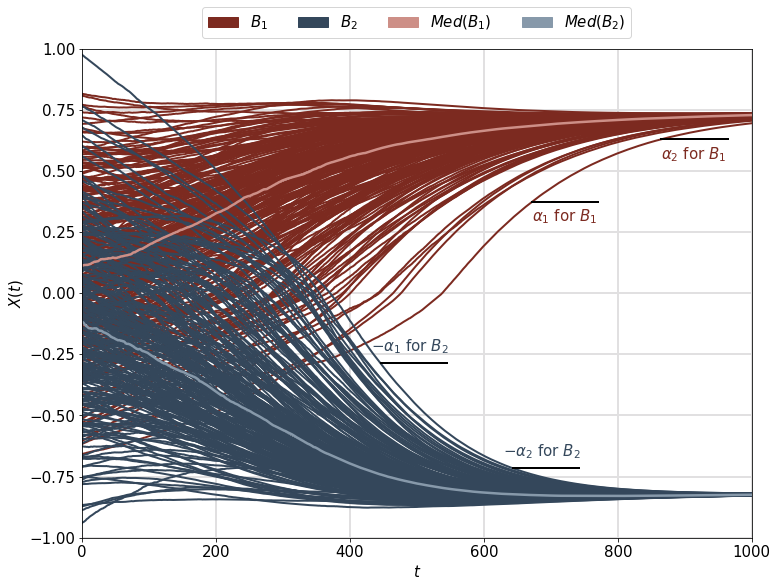

In [79]:
tStop = 1000
PLot(bubble1, bubble2, tfB1,t0B1,t0B2,tfB2)

# Saving Data

```
df1 = pd.DataFrame(bubble1)
df1.to_csv(r'C:\Users\R\Desktop\Data\ModeL2_case2_B1_v1.csv')

df2 = pd.DataFrame(bubble2)
df2.to_csv(r'C:\Users\R\Desktop\Data\ModeL2_case2_B2_v1.csv')
```

In [80]:
df1 = pd.DataFrame(bubble1)
df1.to_csv(r'C:\Users\R\Desktop\Data\ModeL2_case2_B1_v1.csv')

df2 = pd.DataFrame(bubble2)
df2.to_csv(r'C:\Users\R\Desktop\Data\ModeL2_case2_B2_v1.csv')